In [21]:
import keras
keras.__version__

'2.2.4'

In [2]:
import plaidml.keras
plaidml.keras.install_backend()

In [3]:
from keras.datasets import imdb
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:

from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
#smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [6]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 186us/step - loss: 0.4518 - acc: 0.8146 - val_loss: 0.3424 - val_acc: 0.8736
Epoch 2/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.2534 - acc: 0.9108 - val_loss: 0.2839 - val_acc: 0.8892
Epoch 3/20
25000/25000 [==============================] - 4s 153us/step - loss: 0.1971 - acc: 0.9296 - val_loss: 0.2833 - val_acc: 0.8871
Epoch 4/20
25000/25000 [==============================] - 4s 155us/step - loss: 0.1636 - acc: 0.9423 - val_loss: 0.3651 - val_acc: 0.8581
Epoch 5/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.1404 - acc: 0.9500 - val_loss: 0.3146 - val_acc: 0.8791
Epoch 6/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.1233 - acc: 0.9571 - val_loss: 0.3380 - val_acc: 0.8757
Epoch 7/20
25000/25000 [==============================] - 4s 148us/step - 

In [7]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.4327 - acc: 0.8304 - val_loss: 0.3369 - val_acc: 0.8788
Epoch 2/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.2585 - acc: 0.9132 - val_loss: 0.2857 - val_acc: 0.8898
Epoch 3/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.2034 - acc: 0.9301 - val_loss: 0.2844 - val_acc: 0.8863
Epoch 4/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.1718 - acc: 0.9406 - val_loss: 0.2897 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 4s 157us/step - loss: 0.1504 - acc: 0.9488 - val_loss: 0.3030 - val_acc: 0.8799
Epoch 6/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.1349 - acc: 0.9543 - val_loss: 0.3132 - val_acc: 0.8792
Epoch 7/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.1212 - acc: 0.9600 - val_loss: 0.3304 - 

In [8]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [9]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 14s 559us/step - loss: 0.4654 - acc: 0.7936 - val_loss: 0.3210 - val_acc: 0.8682
Epoch 2/20
25000/25000 [==============================] - 12s 499us/step - loss: 0.2213 - acc: 0.9132 - val_loss: 0.3196 - val_acc: 0.8683
Epoch 3/20
25000/25000 [==============================] - 12s 488us/step - loss: 0.1270 - acc: 0.9525 - val_loss: 0.5746 - val_acc: 0.8091
Epoch 4/20
25000/25000 [==============================] - 12s 483us/step - loss: 0.0759 - acc: 0.9781 - val_loss: 0.4244 - val_acc: 0.8814
Epoch 5/20
25000/25000 [==============================] - 12s 489us/step - loss: 0.0836 - acc: 0.9864 - val_loss: 0.4721 - val_acc: 0.8815
Epoch 6/20
25000/25000 [==============================] - 13s 516us/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.8455 - val_acc: 0.8469
Epoch 7/20
25000/25000 [==============================] - 12s 489us/step - loss: 0.0945 - acc: 0.9906 - val_loss: 0.

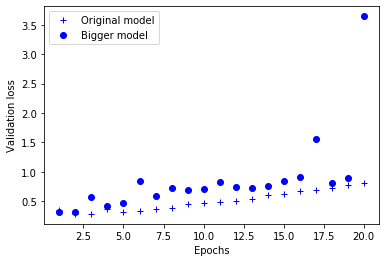

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

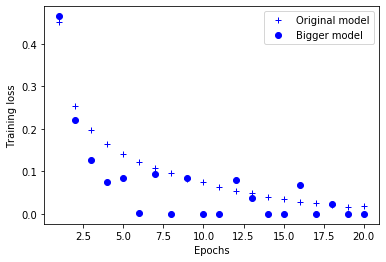

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [14]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid')

SyntaxError: unexpected EOF while parsing (<ipython-input-14-1d093ff4ec3d>, line 8)

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()